In [1]:
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
from statsmodels.tsa.tsatools import detrend
from functools import partial
import scipy.stats as stats
import seaborn as sns
import numpy as np
%matplotlib inline

In [5]:
if 'snakemake' in globals():
    to_file = True
    path='./'
else:
    path = '../../data/data/results/timeseries_table.csv'
    to_file= False


In [6]:
def plot_correlations(df, figsize=(27,23)):
    corrs = df.corr()
    p_values = df.corr(method=lambda x, y: stats.pearsonr(x, y)[1]) - np.eye(len(df.columns)) 
    mask = np.triu(np.ones_like(corrs.values, dtype=bool))
    corrs_triu = corrs.where((mask==False)) 
    significant_corrs = corrs_triu.round(2).where((p_values <=0.05), other='')

    fig = plt.figure(figsize=figsize)
    ax = plt.axes()
    ax.set_aspect('equal')


    sns.heatmap(corrs.values, mask=mask,
                xticklabels=corrs.columns.values,annot=significant_corrs,
                yticklabels=corrs.columns.values, ax=ax, cmap='coolwarm',fmt='',annot_kws={'fontsize':8, 'color':'black'}, vmin=-1,vmax=1)

In [7]:
df= pd.read_csv(path, index_col=0)

df = df.rename(columns={'Temp gradient anomalies MAM':'EATG MAM','Temp gradient anomalies_DJF':'EATG DJF',
                       'AO EOF MAM':'AO MAM','AO EOF DJF':'AO DJF'})

df = df.drop(['NAO station MAM', 'NAO station DJF', 'Total'], axis=1)

detrend_func = partial(detrend, axis=1)
detrended=df.apply(detrend_func,raw=True)

In [8]:
cir_idicies = detrended[['AO DJF','MO DJF', 'SHI DJF','EAWMI DJF', 'EATG DJF','AO MAM','MO MAM', 'SHI MAM','EAWMI MAM','EATG MAM']]

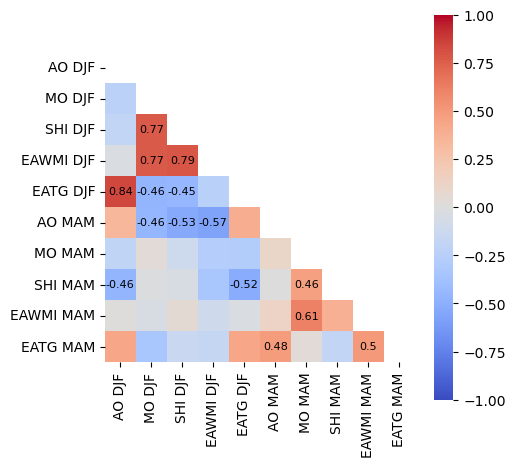

In [9]:
plot_correlations(cir_idicies, figsize=(5,5))
fig = plt.gcf()
ax = plt.gca()
plt.savefig('circulation_corelations.png', dpi=300, bbox_inches='tight')